In [6]:
import numpy as np
from pathlib import Path
import os
from osgeo import gdal
from skimage.util.shape import view_as_windows
import imageio
from tqdm import tqdm
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [3]:
dataset_path = Path('/home/thiago/AmazonDeforestation_Prediction/OpenSTL/data/Dataset/DETR_Patches')

filenames_input = os.listdir(dataset_path / 'Train' / 'Input')
filenames_labels = os.listdir(dataset_path / 'Train' / 'Labels')
print(filenames_input)
print(filenames_labels)

['patch=2829_trimester_window=1.npy', 'patch=540_trimester_window=3.npy', 'patch=3316_trimester_window=2.npy', 'patch=561_trimester_window=1.npy', 'patch=372_trimester_window=2.npy', 'patch=2663_trimester_window=3.npy', 'patch=2782_trimester_window=3.npy', 'patch=372_trimester_window=1.npy', 'patch=3180_trimester_window=2.npy', 'patch=302_trimester_window=1.npy', 'patch=516_trimester_window=1.npy', 'patch=1432_trimester_window=3.npy', 'patch=2329_trimester_window=3.npy', 'patch=2591_trimester_window=1.npy', 'patch=347_trimester_window=1.npy', 'patch=2070_trimester_window=3.npy', 'patch=339_trimester_window=1.npy', 'patch=3258_trimester_window=0.npy', 'patch=2596_trimester_window=3.npy', 'patch=3097_trimester_window=0.npy', 'patch=2969_trimester_window=3.npy', 'patch=546_trimester_window=2.npy', 'patch=107_trimester_window=3.npy', 'patch=2549_trimester_window=2.npy', 'patch=3244_trimester_window=1.npy', 'patch=2728_trimester_window=0.npy', 'patch=377_trimester_window=1.npy', 'patch=2579

In [50]:
for filename in filenames_input:
    img = np.load(dataset_path / 'Train' / 'Input' / filename)
    if img.max() == 3:
        print(filename)
        break

patch=2211_trimester_window=3.npy


2826
patch=1807_trimester_window=2.npy
(4, 64, 64)
(64, 64)
(5, 64, 64)


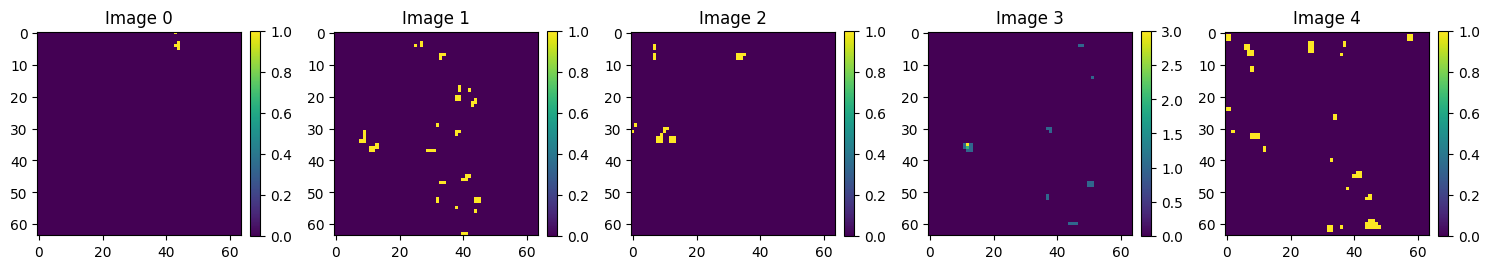

In [51]:
idx = np.random.randint(0, len(filenames_input))
print(idx)
idx = 2211
input_path = dataset_path / 'Train' / 'Input' / f'patch={idx}_trimester_window=0.npy'
label_path = dataset_path / 'Train' / 'Labels' / f'patch={idx}_trimester_window=0.npy'

print(filenames_input[idx])
input_img = np.load(input_path)
label_img = np.load(label_path)
input_label_img = np.concatenate([input_img, np.expand_dims(label_img, axis=0)], axis=0)

print(input_img.shape)
print(label_img.shape)
print(input_label_img.shape)

# Create a figure with 1 row and 5 columns
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i in range(5):
    # Plot each image in a separate subplot
    im = axes[i].imshow(input_label_img[i])
    axes[i].set_title(f'Image {i}')
    plt.colorbar(im, ax=axes[i], orientation='vertical', fraction=0.046, pad=0.04)
    
# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Display the plot
plt.show()

# Check Temporal Order of Patches

In [57]:
def plot_images(images, titles=None):
    num_images = len(images)

    # Create a figure with 1 row and num_images columns
    fig, axes = plt.subplots(1, num_images, figsize=(5 * num_images, 3))

    # Iterate over images and axes, adding each image and colorbar to a subplot
    for ax, img, title in zip(axes, images, titles or [f'Image {i+1}' for i in range(num_images)]):
        im = ax.imshow(img)
        ax.set_title(title)
        plt.colorbar(im, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)

    # Adjust layout to prevent clipping of titles
    plt.tight_layout()

    # Display the plot
    plt.show()

[[ 0  0  0 ...  4  4  4]
 [ 0  0  0 ...  4  4  4]
 [ 0  0  0 ...  4  4  4]
 ...
 [15 15 15 ... 19 19 19]
 [15 15 15 ... 19 19 19]
 [15 15 15 ... 19 19 19]]
(2048, 2560)


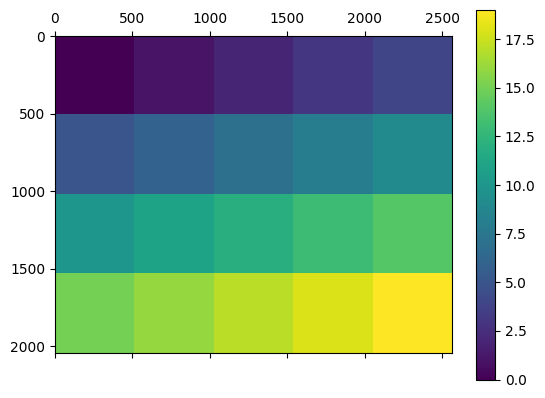

In [67]:
# Define the dimensions
array_shape = (2048, 2560)
patch_size = (512, 512)

# Create an empty array of the desired shape
result_array = np.zeros(array_shape, dtype=int)

# Loop through the array with a sliding window of patch_size
for i in range(0, array_shape[0], patch_size[0]):
    for j in range(0, array_shape[1], patch_size[1]):
        # Calculate the index for the current patch
        patch_index = (i // patch_size[0]) * (array_shape[1] // patch_size[1]) + (j // patch_size[1])
        
        # Fill the current patch with the patch_index
        result_array[i:i + patch_size[0], j:j + patch_size[1]] = patch_index

# Print the result
print(result_array)

print(result_array.shape)
# Create a figure and axis for the plot
fig, ax = plt.subplots()
cax = ax.matshow(result_array, cmap='viridis')

# Add a colorbar for reference
cbar = plt.colorbar(cax)

# Show the plot
plt.show()

In [65]:
def extract_patches2(image: np.ndarray, patch_size: int, stride: int) -> np.ndarray:
    window_shape_array = (image.shape[0], patch_size, patch_size)
    print(window_shape_array)
    return np.array(view_as_windows(image, window_shape_array, step=stride)).reshape((-1,) + window_shape_array)

print(result_array.shape)
patches_index = extract_patches2(result_array, patch_size=512, stride=512)
print(patches_index.shape)
img_index = patches_index.reshape(result_array.shape)
print(img_index.shape)

# Define the dimensions and create the result_array as shown previously

# Create a figure and axis for the plot
fig, ax = plt.subplots()
cax = ax.matshow(img_index, cmap='viridis')

# Add a colorbar for reference
cbar = plt.colorbar(cax)

# Show the plot
plt.show()

(2048, 2560)
(2048, 512, 512)


ValueError: `window_shape` is incompatible with `arr_in.shape`

(2, 2048, 2560)
19 -19


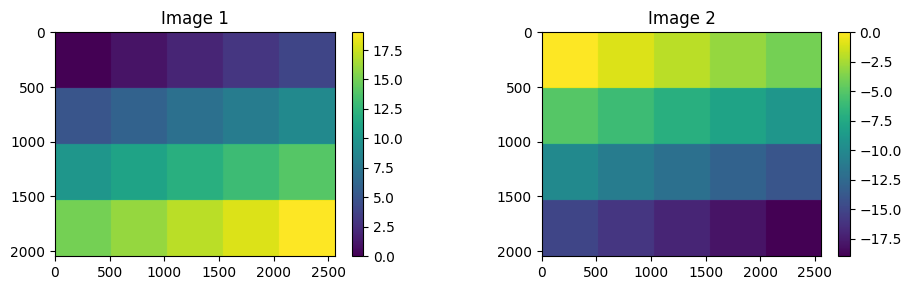

(2048, 2560)
(2, 512, 512)
DEBUG
(20, 2, 512, 512)
(2, 2048, 2560)
19 -19


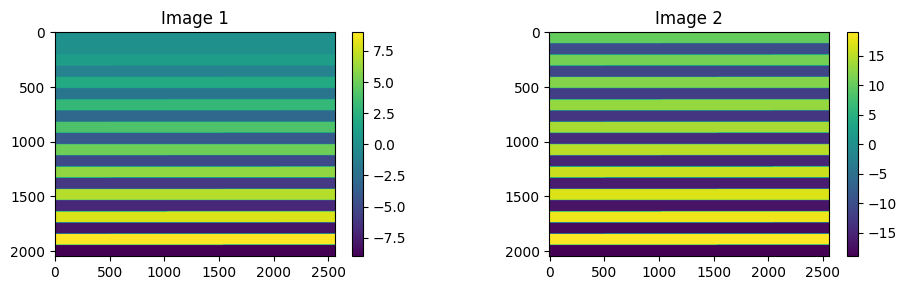

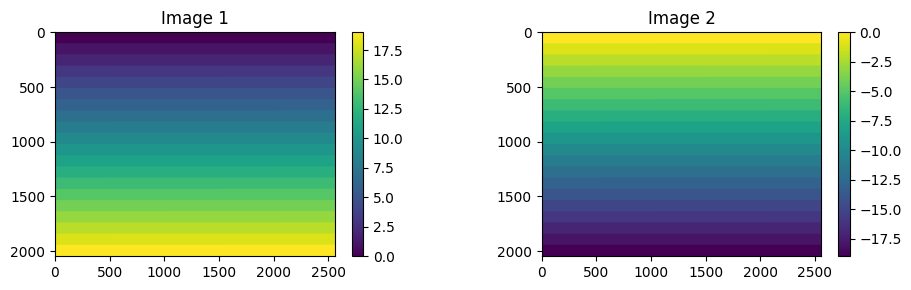

In [85]:
def extract_patches2(image: np.ndarray, patch_size: int, stride: int) -> np.ndarray:
    window_shape_array = (image.shape[0], patch_size, patch_size)
    print(window_shape_array)
    return np.array(view_as_windows(image, window_shape_array, step=stride)).reshape((-1,) + window_shape_array)

result_array2 = np.stack([result_array, -1 * result_array], axis=0)
print(result_array2.shape)
print(result_array2.max(), result_array2.min())
plot_images(result_array2, titles=None)


print(result_array.shape)
patches_index = extract_patches2(result_array2, patch_size=512, stride=512)
print('DEBUG')
print(patches_index.shape)
img_index2 = patches_index.reshape(result_array2.shape)
print(img_index2.shape)
print(img_index2.max(), img_index2.min())

plot_images(img_index2, titles=None)

# # Create a figure and axis for the plot
# fig, ax = plt.subplots()
# cax = ax.matshow(img_index, cmap='viridis')

# # Add a colorbar for reference
# cbar = plt.colorbar(cax)

# # Show the plot
# plt.show()
res1 = patches_index[:, 0].reshape(result_array.shape)
res2 = patches_index[:, 1].reshape(result_array.shape)
plot_images([res1, res2], titles=None)

In [81]:
print(patches_index.shape)
print(patches_index[2].shape)
print(patches_index[2, 0].shape, patches_index[2, 1].shape)
print(patches_index[2, 0].max(), patches_index[2, 0].min())
print(patches_index[2, 1].max(), patches_index[2, 1].min())

(20, 2, 512, 512)
(2, 512, 512)
(512, 512) (512, 512)
2 2
-2 -2
